In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [2]:
def pairwise_correlation(y, mask):
    K, L = y.shape
    correlation_matrix = np.zeros((K, K))

    for i in range(K):
        for j in range(i, K):
            # Get the two spatial points and their corresponding masks
            point1 = y[i]
            point2 = y[j]
            mask1 = mask[i]
            mask2 = mask[j]

            # Find indices where both points have observed values
            valid_indices = np.where((mask1 == 1) & (mask2 == 1))[0]

            # If there are enough valid points, calculate the correlation
            if len(valid_indices) > 2:
                valid_point1 = point1[valid_indices]
                valid_point2 = point2[valid_indices]

                # Calculate correlation
                correlation = np.corrcoef(valid_point1, valid_point2)[0, 1]
            else:
                # Not enough data to calculate correlation
                correlation = 0

            # Store the correlation
            correlation_matrix[i, j] = correlation
            if i != j:
                correlation_matrix[j, i] = correlation

    return correlation_matrix


In [43]:
# example 1 
from data import SoilMoisture
data = SoilMoisture()
y = data.y
x = data.x
mask = data.mask
space_coords = data.space_coords


correlation_matrix = pairwise_correlation(y, mask)





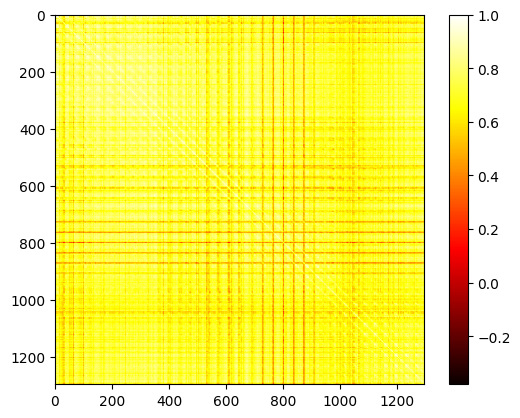

In [35]:
# Plot the correlation matrix
plt.imshow(correlation_matrix, cmap='hot')

# add colorbar
plt.colorbar()

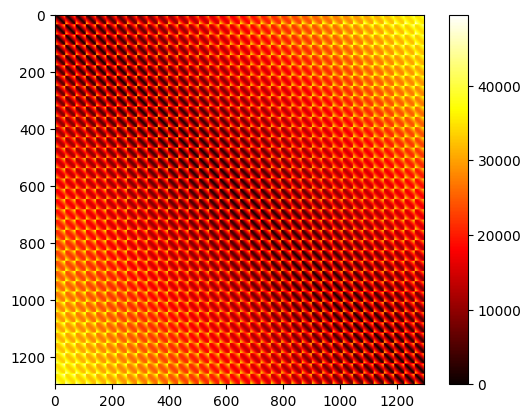

In [48]:
# heat map for dist
dist = squareform(pdist(space_coords))
plt.imshow(dist, cmap='hot')
plt.colorbar()

In [40]:
# example 2
from data import AQ
data = AQ()
y = data.y
mask = data.mask

space_coords = data.space_coords

correlation_matrix = pairwise_correlation(y, mask)

/Users/kehuiyao/Desktop/thesis/spatiotemporal_imputation/.conda/lib/python3.9/site-packages/tsl/ops/framearray.py:181: FutureWarning: The provided callable <function nanmean at 0x110170a60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  nan_mean = df_mean.groupby(conditions[0]).transform(np.nanmean)
/Users/kehuiyao/Desktop/thesis/spatiotemporal_imputation/.conda/lib/python3.9/site-packages/tsl/ops/framearray.py:181: FutureWarning: The provided callable <function nanmean at 0x110170a60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  nan_mean = df_mean.groupby(conditions[0]).transform(np.nanmean)
/Users/kehuiyao/Desktop/thesis/spatiotemporal_imputation/.conda/lib/python3.9/site-packages/tsl/ops/framearray.py:181: FutureWarning: The 

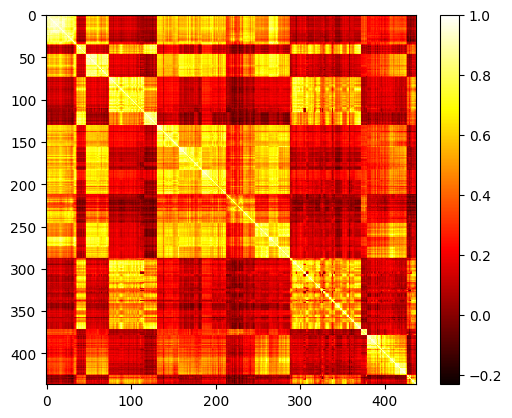

In [41]:
# heat map for correlation
plt.imshow(correlation_matrix, cmap='hot')

# add colorbar
plt.colorbar()

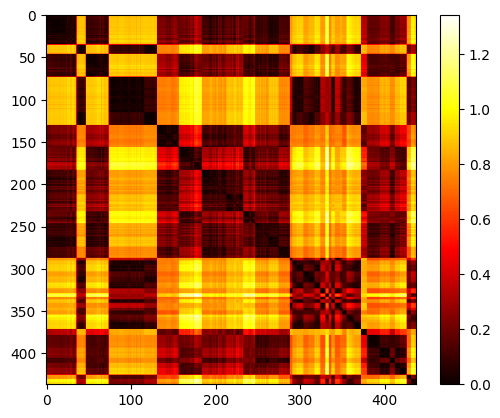

In [42]:
# heat map for dist
dist = squareform(pdist(space_coords))
plt.imshow(dist, cmap='hot')
plt.colorbar()

In [6]:
# example 3
from data import KaustCompetition
data = KaustCompetition(dataset_index=2)
y = data.y
mask = data.mask

eval_mask = data.eval_mask

observed_mask = mask - eval_mask

space_coords = data.space_coords

correlation_matrix_observed = pairwise_correlation(y, observed_mask)
correlation_matrix_eval = pairwise_correlation(y, eval_mask)

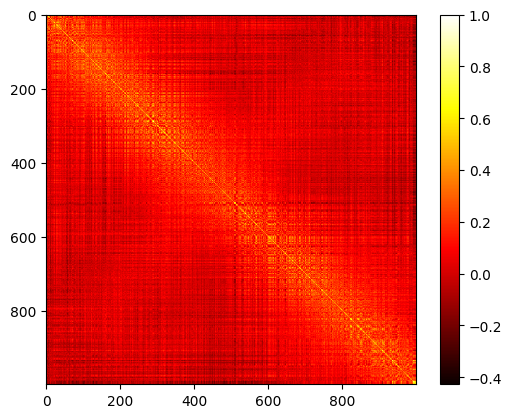

In [7]:
# heat map for correlation
plt.imshow(correlation_matrix_observed, cmap='hot')

# add colorbar
plt.colorbar()

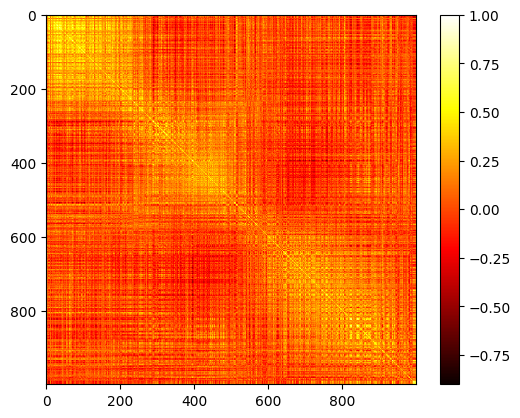

In [8]:
# heat map for correlation
plt.imshow(correlation_matrix_eval, cmap='hot')

# add colorbar
plt.colorbar()

In [3]:
# example 4
from data import GP
num_nodes = 100
seq_len = 50
data = GP(num_nodes=num_nodes, seq_len=seq_len)
y = data.y
mask = data.mask

space_coords = data.space_coords

correlation_matrix = pairwise_correlation(y, mask)



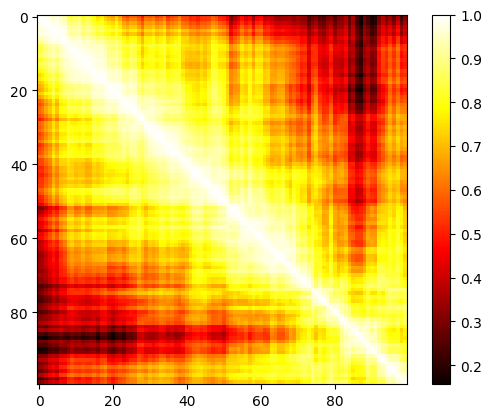

In [4]:
# heat map for correlation
plt.imshow(correlation_matrix, cmap='hot')

# add colorbar
plt.colorbar()